# Numeric optimization in logistic regression

## Team members:

1. Project manager - Adema
2. Technical writer - Daulet
3. Author of executable content - Meiram Sopy
4. Designer of interative plots - Amina
5. Designer of quizzes - Adilzhan

Link of the book [here](https://headsman-4899.github.io/Numeric_optimization_for_logistic_regression/intro.html)

To find the optimal weights of the logistic regression, we can use {prf:ref}`gradient descent <GD>` algorithm. To apply this algorithm, one need to calculate the gradient of the loss function.

## Gradient Descent (GD)

The objective is to find the weights $(w)$ that minimize the logistic loss function, given by:

$$ 
    \text{Loss}(\mathbf{w}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

Here, $ N $ represents the number of samples, $ y_i $ is the true label of the $ i $-th sample (0 or 1), and $ p_i $ is the predicted probability of the $ i $-th sample belonging to class 1.

### Calculating the Gradient

The key step in gradient descent is to compute the gradient of the loss function with respect to each weight (`w_j`). For logistic regression, the gradient is given by:

$$
     \frac{\partial \text{Loss}}{\partial w_j} = \frac{1}{N} \sum_{i=1}^{N} (p_i - y_i) x_{ij} 
$$

This gradient reflects how the loss changes concerning each weight, guiding the optimization process.

### Update Rule

The weights are then updated using the following rule:

$$ 
    w_j = w_j - \alpha \frac{\partial \text{Loss}}{\partial w_j}
$$

Here, $ \alpha $ is the learning rate, determining the size of the step taken in each iteration.

### Example

Let's consider a simple example with binary classification. Suppose we have a dataset with one feature (`x`) and binary labels (`y`). The logistic regression model predicts the probability of class 1 using the sigmoid function:

$$ 
    p(x) = \frac{1}{1 + e^{-(w_0 + w_1 \cdot x)}}
$$

The logistic loss for a single sample is:

$$ 
    \text{Loss} = -[y \log(p) + (1 - y) \log(1 - p)]
$$

By applying gradient descent, we iteratively update $ w_0 $ and $ w_1 $ to minimize the overall loss across all samples, converging to optimal weights for the logistic regression model.



In [46]:
from jupyterquiz import display_quiz

q_gradient_descent_logistic_regression = [
    {
        "question": "What is the primary objective of the Gradient Descent algorithm in logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "To maximize the logistic loss function",
                "correct": False,
                "feedback": "Incorrect. The primary objective is to minimize the logistic loss function."
            },
            {
                "answer": "To minimize the logistic loss function",
                "correct": True,
                "feedback": "Correct! Gradient Descent aims to minimize the logistic loss function."
            },
            {
                "answer": "To maximize the accuracy of the model",
                "correct": False,
                "feedback": "Incorrect. Gradient Descent focuses on minimizing the loss, not maximizing accuracy."
            },
            {
                "answer": "To calculate the Hessian matrix",
                "correct": False,
                "feedback": "Incorrect. Calculating the Hessian matrix is not the primary objective of Gradient Descent."
            }
        ]
    },
    {
        "question": "What does the gradient of the logistic loss function with respect to a weight (w_j) represent?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "The predicted probability (p)",
                "correct": False,
                "feedback": "Incorrect. The gradient represents how the loss changes concerning the weight, not the predicted probability."
            },
            {
                "answer": "The rate of change of the loss with respect to the weight",
                "correct": True,
                "feedback": "Correct! The gradient indicates how the loss changes concerning the weight."
            },
            {
                "answer": "The learning rate",
                "correct": False,
                "feedback": "Incorrect. The learning rate is a separate parameter used in the update rule."
            },
            {
                "answer": "The Hessian matrix",
                "correct": False,
                "feedback": "Incorrect. The Hessian matrix is not directly related to the gradient in this context."
            }
        ]
    },
    {
        "question": "What is the purpose of the learning rate (Œ±) in the update rule for logistic regression weights?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "To determine the number of iterations",
                "correct": False,
                "feedback": "Incorrect. The learning rate affects the size of the step taken in each iteration."
            },
            {
                "answer": "To control the convergence speed",
                "correct": True,
                "feedback": "Correct! The learning rate influences how quickly the algorithm converges to the optimal weights."
            },
            {
                "answer": "To calculate the gradient",
                "correct": False,
                "feedback": "Incorrect. The learning rate is not involved in the calculation of the gradient."
            },
            {
                "answer": "To initialize the weights",
                "correct": False,
                "feedback": "Incorrect. The learning rate is not used for weight initialization."
            }
        ]
    }
]

q_gradient_descent_q4 = [
    {
        "question": "Consider the logistic loss function for binary classification. If the predicted probability (p) for a sample is 0.7 and the true label (y) is 0, what is the value of the logistic loss for this sample? Provide your answer in numeric form.",
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 0.35667494393873245,
                "correct": True,
                "feedback": "Correct! The logistic loss for the given scenario is approximately 0.3567."
            },
            {
                "type": "default",
                "feedback": "Incorrect. Please check your calculation."
            }
        ]
    }
]


# Display the questions
display_quiz(q_gradient_descent_logistic_regression, num=1)

# Display the numeric questions
display_quiz(q_gradient_descent_q4)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Binary logistic regression

Multiply the loss function {eq}`bin-log-reg-loss` by $n$:

$$
\mathcal L(\boldsymbol w) = 
-\sum\limits_{i=1}^n \big(y_i \log(\sigma(\boldsymbol x_i^\top \boldsymbol w)) + (1- y_i)\log(1 - \sigma(\boldsymbol x_i^\top \boldsymbol w))\big).
$$

To find $\nabla \mathcal L(\boldsymbol w)$ observe that

$$
   \nabla \log(\sigma(\boldsymbol x_i^\top \boldsymbol w)) = \frac {\nabla \sigma(\boldsymbol x_i^\top \boldsymbol w)}{\sigma(\boldsymbol x_i^\top \boldsymbol w)} = 
   \frac{\sigma'(\boldsymbol x_i^\top \boldsymbol w) \nabla(\boldsymbol x_i^\top \boldsymbol w)}{{\sigma(\boldsymbol x_i^\top \boldsymbol w)}}.
$$

Also,

$$
   \nabla \log(1 - \sigma(\boldsymbol x_i^\top \boldsymbol w)) = -\frac {\nabla  \sigma(\boldsymbol x_i^\top \boldsymbol w)}{1 - \sigma(\boldsymbol x_i^\top \boldsymbol w)} = 
   \frac{\sigma'(\boldsymbol x_i^\top \boldsymbol w) \nabla(\boldsymbol x_i^\top \boldsymbol w)}{{1 - \sigma(\boldsymbol x_i^\top \boldsymbol w)}}.
$$

**Q**. What is $\nabla(\boldsymbol x_i^\top \boldsymbol w)$?

Putting it altogeter, we get

$$
   \nabla \mathcal L(\boldsymbol w) = -\sum\limits_{i=1}^n \big(y_i(1 - \sigma(\boldsymbol x_i^\top \boldsymbol w))\boldsymbol x_i - (1-y_i)\sigma(\boldsymbol x_i^\top \boldsymbol w)\boldsymbol x_i\big) = \sum\limits_{i=1}^n (\sigma(\boldsymbol x_i^\top \boldsymbol w) - y_i)\boldsymbol x_i.
$$

````{admonition} Question
:class: important
How to write $\nabla \mathcal L(\boldsymbol w)$ as a product of a matrix and a vector, avoiding the explicit summation?

```{hint}
:class: dropdown
The shape of $\nabla \mathcal L(\boldsymbol w)$ is the same as of $\boldsymbol w$, i.e., $d\times 1$. Now observe that

$$
   \begin{pmatrix}
   \sigma(\boldsymbol x_1^\top \boldsymbol w) - y_1 \\
   \vdots \\
   \sigma(\boldsymbol x_n^\top \boldsymbol w) - y_n
   \end{pmatrix}
   = \sigma(\boldsymbol X \boldsymbol w )- \boldsymbol y \in \mathbb R^n.
$$

What should we multiply by this vector to obtain $\nabla \mathcal L$?
```
````

````{admonition} Question
:class: important
 What is hessian $\nabla^2 L(\boldsymbol w)$?

```{admonition} Answer
:class: tip, dropdown
$$
\nabla^2 L(\boldsymbol w) = \boldsymbol X^\top \boldsymbol S \boldsymbol X,
$$

where

$$
   \boldsymbol S = \mathrm{diag}\{\sigma(\boldsymbol X \boldsymbol w )- \boldsymbol y\} = \begin{pmatrix}
   \sigma(\boldsymbol x_1^{\boldsymbol{\top}} \boldsymbol w) - y_1  & \ldots & 0 \\
   \vdots & \ddots & \vdots \\
   0 & \ldots & \sigma(\boldsymbol x_n^{\boldsymbol{\top}} \boldsymbol w) - y_n
   \end{pmatrix}
$$
```
````

In [47]:

# Quiz 1: Gradient Descent in Binary Logistic Regression
q_gradient_descent = [
    {
        "question": "What is ùëõùëéùëèùëôùëé(ùê±ùëñ‚ä§ùê∞)?",
        "type": "many_choice",
        "answers": [
            {"answer": "ùë•ùëñ‚ä§", "correct": False},
            {"answer": "ùë•ùëñ", "correct": False},
            {"answer": "ùëõùëéùëèùëôùëé(ùë•ùëñ‚ä§ùê∞)", "correct": False},
            {"answer": "ùê∞", "correct": False}
        ]
    },
    {
        "question": "Write ùëõùëéùëèùëôùëé ùêø(ùê∞) as a product of a matrix and a vector, avoiding the explicit summation.",
        "type": "many_choice",
        "answers": [
            {"answer": "ùëã‚ãÖ(ùúé(ùëãùê∞)‚àíùê≤)", "correct": True},
            {"answer": "ùúé(ùëãùê∞)‚ãÖùëã‚àíùê≤", "correct": False},
            {"answer": "ùëã‚ä§‚ãÖ(ùúé(ùëãùê∞)‚àíùê≤)", "correct": False},
            {"answer": "(ùúé(ùëãùê∞)‚àíùê≤)‚ãÖùëã‚ä§", "correct": False}
        ]
    },
    {
        "question": "What is the Hessian ùëõùëéùëèùëôùëé2ùêø(ùê∞)?",
        "type": "many_choice",
        "answers": [
            {"answer": "ùëã‚ãÖùëÜ‚ãÖùëã‚ä§", "correct": False},
            {"answer": "ùëã‚ä§‚ãÖùëÜ‚ãÖùëã", "correct": False},
            {"answer": "ùëã‚ä§‚ãÖùëÜ‚ãÖùëã‚ä§", "correct": True},
            {"answer": "ùëã‚ãÖùëã‚ä§‚ãÖùëÜ", "correct": False}
        ]
    }
]

# Quiz 2: Binary Logistic Regression Formulas
q_binary_logistic_regression = [
    {
        "question": "What is ùëõùëéùëèùëôùëé(ùë•ùëñ‚ä§ùê∞)?",
        "type": "many_choice",
        "answers": [
            {"answer": "ùëõùëéùëèùëôùëé(ùë•ùëñ‚ä§ùê∞)", "correct": False},
            {"answer": "ùëõùëéùëèùëôùëé(1‚àíùúé(ùë•ùëñ‚ä§ùê∞))", "correct": True},
            {"answer": "1‚àíùúé(ùë•ùëñ‚ä§ùê∞)", "correct": False},
            {"answer": "ùëõùëéùëèùëôùëé(ùúé(ùë•ùëñ‚ä§ùê∞))", "correct": False}
        ]
    },
    {
        "question": "Express ùëõùëéùëèùëôùëé ùêø(ùê∞) as a product of a matrix and a vector, avoiding the explicit summation.",
        "type": "many_choice",
        "answers": [
            {"answer": "ùëã‚ãÖ(ùúé(ùëãùê∞)‚àíùê≤)", "correct": True},
            {"answer": "ùúé(ùëãùê∞)‚ãÖùëã‚àíùê≤", "correct": False},
            {"answer": "ùëã‚ä§‚ãÖ(ùúé(ùëãùê∞)‚àíùê≤)", "correct": False},
            {"answer": "(ùúé(ùëãùê∞)‚àíùê≤)‚ãÖùëã‚ä§", "correct": False}
        ]
    },
    {
        "question": "What is ùêªùëíùë†ùë†ùëñùëéùëõ ùëõùëéùëèùëôùëé2ùêø(ùê∞)?",
        "type": "many_choice",
        "answers": [
            {"answer": "ùëã‚ãÖùëÜ‚ãÖùëã‚ä§", "correct": False},
            {"answer": "ùëã‚ä§‚ãÖùëÜ‚ãÖùëã", "correct": False},
            {"answer": "ùëã‚ä§‚ãÖùëÜ‚ãÖùëã‚ä§", "correct": True},
            {"answer": "ùëã‚ãÖùëã‚ä§‚ãÖùëÜ", "correct": False}
        ]
    }
]

# Quiz 3: Approximating e
q_approximating_e = [
    {
        "question": "Find the maximum integer ùëõ such that |ùëí‚àí2.7(1828)|<1/10^ùëõ.",
        "type": "numeric",
        "answers": [
            {"type": "value", "value": 9, "correct": True, "feedback": "Correct!"},
            {"type": "default", "feedback": "Incorrect. Try again."}
        ]
    },
    {
        "question": "Find the maximum integer ùëõ such that |ùëí‚àí2.718281828|<1/10^ùëõ.",
        "type": "numeric",
        "answers": [
            {"type": "value", "value": 9, "correct": True, "feedback": "Correct!"},
            {"type": "default", "feedback": "Incorrect. Try again."}
        ]
    },
    {
        "question": "Find the maximum integer ùëõ such that |ùëí‚àí2.718281828459045|<1/10^ùëõ.",
        "type": "numeric",
        "answers": [
            {"type": "value", "value": 15, "correct": True, "feedback": "Correct!"},
            {"type": "default", "feedback": "Incorrect. Try again."}
        ]
    }
]

# Display the quizzes
display_quiz(q_gradient_descent, num=1)
display_quiz(q_binary_logistic_regression, num=1)
display_quiz(q_approximating_e, num=1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Breast cancer dataset: numeric optimization 

Fetch the dataset:

In [48]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target
X.shape, y.shape

((569, 30), (569,))

Apply the {prf:ref}`gradient descent <GD>` algorithm to the logistic regression:

In [49]:
import numpy as np
from scipy.special import expit

def logistic_regression_gd(X, y, C=1, learning_rate=0.01, tol=1e-3, max_iter=10000):
    w = np.random.normal(size=X.shape[1])
    gradient = X.T.dot(expit(X.dot(w)) - y) + C * w
    for i in range(max_iter):
        if np.linalg.norm(gradient) <= tol:
            return w
        w -= learning_rate * gradient
        gradient = X.T.dot(expit(X.dot(w)) - y) + C * w
    print("max_iter exceeded")
    return w

Fit the logistic regresion on the whole dataset:

In [50]:
%time w = logistic_regression_gd(X, y, learning_rate=2e-7, max_iter=10**6)
w

max_iter exceeded
CPU times: user 6min 37s, sys: 14.8 s, total: 6min 51s
Wall time: 54.6 s


array([ 0.65566136,  0.20461692,  0.73333743, -0.02445936, -1.46632754,
       -0.51523058,  0.90489485,  1.1216428 ,  0.27786126, -0.49319081,
       -0.32434331,  0.67655288, -0.35132137, -0.15170614,  0.04745084,
       -0.05183498, -1.18792779,  0.78408483, -0.44926549, -0.78413152,
        2.69331982, -0.59370696, -0.54648335, -0.03537811,  1.08626916,
       -0.90655425, -0.82969542, -0.98432238, -0.27025943, -0.08298688])

Calculate the accuracy score:

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(expit(X.dot(w)) > 0.5, y)

0.9472759226713533

Compare with `sklearn`:

In [52]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept=False, max_iter=5000)
log_reg.fit(X, y)
print(log_reg.score(X, y))
print(accuracy_score(log_reg.predict(X), y))
log_reg.coef_

0.9595782073813708
0.9595782073813708


array([[ 2.1975179 ,  0.11135549, -0.07305484, -0.00335447, -0.16745265,
        -0.41425964, -0.67991182, -0.36939821, -0.2430434 , -0.02410403,
        -0.02336256,  1.20717466,  0.04631705, -0.09649416, -0.01903567,
         0.01810195, -0.03747183, -0.04324005, -0.04367351,  0.00878879,
         1.29284173, -0.33773315, -0.12388807, -0.02474166, -0.31037867,
        -1.14588466, -1.63908301, -0.70741377, -0.73405013, -0.11303725]])

In [53]:
np.linalg.norm(w - log_reg.coef_)

4.297130320781463

## Multinomial logistic regression

Recall that the loss function in this case is

$$
    \mathcal L(\boldsymbol W) = -\sum\limits_{i=1}^n \sum\limits_{k=1}^K  y_{ik} \bigg(\boldsymbol x_i^\top\boldsymbol w_{k} -\log\Big(\sum\limits_{k=1}^K \exp(\boldsymbol x_i^\top\boldsymbol w_{k})\Big)\bigg) =
    - \sum\limits_{i=1}^n \sum\limits_{k=1}^K  y_{ik} \bigg(\sum\limits_{j=1}^d x_{ij} w_{jk} -\log\Big(\sum\limits_{k=1}^K \exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)\Big)\bigg)
$$

One can show that 

$$
    \nabla \mathcal L(\boldsymbol W) = \boldsymbol X^\top (\boldsymbol {\widehat Y} - \boldsymbol Y) = \boldsymbol X^\top ( \sigma(\boldsymbol{XW}) - \boldsymbol Y).
$$

<!-- Observe that

$$
    \frac{\partial}{\partial w_{pq}} (x_{ij} w_{jk}) = x_{ij} \delta_{pj} \delta_{qk},
$$

$$
\frac{\partial}{\partial w_{pq}}\bigg(\log\Big(\sum\limits_{k=1}^K \exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)\Big)\bigg) = \frac{\exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)}{\sum\limits_{k=1}^K \exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)} x_{ip} \delta_{qk}
$$

Hence, 

$$
    \frac{\partial \mathcal L}{\partial w_{pq}} = \sum\limits_{i=1}^n \sum\limits_{k=1}^K y_{ik}\bigg(\sum\limits_{j=1}^d  \bigg(  x_{ij} \delta_{pj} \delta_{qk} - \frac{\exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)}{\sum\limits_{k=1}^K \exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)} x_{ip} \delta_{qk}\bigg)\bigg)
$$ -->

## Gradient Descent for Multinomial Logistic Regression

In the context of multinomial logistic regression, the objective is to minimize the negative log-likelihood function.

Gradient Descent Update Rule:
$$ 
    \text{New Parameter} = \text{Old Parameter} - \text{Learning Rate} \times \text{Gradient}
$$

### Example

Let's consider a multinomial logistic regression problem with three categories (classes: A, B, C) and two features (variables: $ X_1, X_2 $).

Logistic function:
$$ 
    P(Y=k|X) = \frac{e^{X \cdot \beta_k}}{\sum_{i=1}^{K} e^{X \cdot \beta_i}}
$$

Negative Log-likelihood:
$$
    \text{Negative Log-Likelihood} = -\sum_{i=1}^{N}\sum_{k=1}^{K} y_{i,k} \log\left(\frac{e^{X_i \cdot \beta_k}}{\sum_{j=1}^{K} e^{X_i \cdot \beta_j}}\right)
$$

Gradient:
$$ 
    \nabla \text{Negative Log-Likelihood} = X^T \cdot (P - Y)
$$

Update rule:
$$
    \beta_k = \beta_k - \text{Learning Rate} \times X^T \cdot (P - Y)
$$

Where:
- $ N $ is the number of observations,
- $ K $ is the number of categories,
- $ X_i $ is the feature vector for observation $ i $,
- $ y_{i,k} $ is the indicator variable (1 if observation $ i $ is in category $ k $, 0 otherwise)

## Newton's Method

To apply Newton's method to find the optimal weights of logistic regression, need: dataset, logistic regression model, sigmoid function, objective function (loss function), calculate the gradient and hessian matrix, convergence criteria.

### Logistic regression model

The logistic regression model predicts the probability of a binary outcome, represented as:

$$ 
    p(x) = \frac{1}{1 + e^{-(\mathbf{w}^T \mathbf{x})}}
$$

Here, $ \mathbf{w} $ is the vector of weights, and $ \mathbf{x} $ is the vector of features.

### Sigmoid function

Define a sigmoid function to transform the linear combination of weights and features into probabilities:

$$ 
    \text{sigmoid}(z) = \frac{1}{1 + e^{-z}}
$$




In [54]:
from jupyterquiz import display_quiz

# Define quiz questions
q_logistic_regression = [
    {
        "question": "What is the purpose of the sigmoid function in logistic regression?",
        "type": "many_choice",
        "answers": [
            {"answer": "a) To calculate the gradient.", "correct": False, "feedback": "Incorrect. The sigmoid function serves a different purpose."},
            {"answer": "b) To transform the linear combination of weights and features into probabilities.", "correct": True, "feedback": "Correct! The sigmoid function transforms the output into probabilities."},
            {"answer": "c) To determine the Hessian matrix.", "correct": False, "feedback": "Incorrect. The sigmoid function is not used for determining the Hessian matrix."},
            {"answer": "d) To represent the loss function.", "correct": False, "feedback": "Incorrect. The sigmoid function is not a representation of the loss function."},
        ]
    },
    {
        "question": "What is the formula for calculating the gradient of the logistic loss function with respect to a weight (w_j) in logistic regression?",
        "type": "many_choice",
        "answers": [
            {"answer": "a) ‚àÇLoss/‚àÇw_j = (1/N) Œ£ (p_i - y_i) x_ij", "correct": True, "feedback": "Correct! This is the correct formula for the gradient."},
            {"answer": "b) ‚àÇLoss/‚àÇw_j = (1/N) Œ£ (y_i - p_i) x_ij", "correct": False, "feedback": "Incorrect. Check the signs in the formula."},
            {"answer": "c) ‚àÇLoss/‚àÇw_j = (1/N) Œ£ (p_i - y_i)", "correct": False, "feedback": "Incorrect. The formula should include features (x_ij)."},
            {"answer": "d) ‚àÇLoss/‚àÇw_j = (1/N) Œ£ x_ij", "correct": False, "feedback": "Incorrect. The formula should involve the difference between predicted and actual values."},
        ]
    },
    {
        "question": "What is the update rule for weights in logistic regression using Newton's method?",
        "type": "many_choice",
        "answers": [
            {"answer": "a) w = w - Œ± ‚àÇLoss/‚àÇw", "correct": True, "feedback": "Correct! This is the update rule for weights in logistic regression using Newton's method."},
            {"answer": "b) w = w - ‚àÇLoss/‚àÇw", "correct": False, "feedback": "Incorrect. The update rule involves both the gradient and the learning rate."},
            {"answer": "c) w = w - Œ± ‚àÇ^2Loss/‚àÇw^2", "correct": False, "feedback": "Incorrect. This involves the second derivative, not the first derivative."},
            {"answer": "d) w = w - ‚àÇ^2Loss/‚àÇw^2", "correct": False, "feedback": "Incorrect. This involves the second derivative, not the first derivative."},
        ]
    }
]


# Display the quiz
display_quiz(q_logistic_regression, shuffle_answers=False, num=2)


<IPython.core.display.Javascript object>

Apply Newton's method for logistic regression:

In [55]:
import numpy as np
from scipy.special import expit

def logistic_regression_newton(X, y, C=1, tol=1e-3, max_iter=10000):
    nw = np.random.normal(size=X.shape[1])
    
    for i in range(max_iter):
        # Compute predicted probabilities
        predictions = expit(X.dot(nw))
        
        # Compute gradient
        gradient = X.T.dot(predictions - y) + C * nw
        
        # Compute Hessian matrix
        hessian = X.T.dot(np.diag(predictions * (1 - predictions))).dot(X) + C * np.eye(X.shape[1])
        
        # Update weights using Newton's method
        nw -= np.linalg.inv(hessian).dot(gradient)
        
        # Check for convergence
        if np.linalg.norm(gradient) <= tol:
            return nw
    
    print("max_iter exceeded")
    return nw

Fit the logistic regression on the whole dataset:

In [56]:
nw = logistic_regression_newton(X, y, max_iter=10**5)
nw

max_iter exceeded


array([-3.702120e+03, -4.580240e+03, -2.445746e+04, -2.074158e+05,
       -2.181448e+01, -3.077981e+01, -3.408424e+01, -1.865388e+01,
       -4.089670e+01, -1.328818e+01, -1.291255e+02, -2.567139e+02,
       -9.166730e+02, -1.540655e+04, -1.437380e+00, -6.843607e+00,
       -8.866690e+00, -3.192820e+00, -4.340149e+00, -8.612300e-01,
       -4.480580e+03, -6.215460e+03, -2.997051e+04, -3.015247e+05,
       -3.070719e+01, -7.946271e+01, -9.552838e+01, -3.863431e+01,
       -6.857520e+01, -1.940435e+01])

Calculate the accuracy score:

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(expit(X.dot(nw)) > 0.5, y)

0.37258347978910367

## Newton's Method for Multinomial Logistic Regression

Let's take the same example from Gradient Descent:
$$
    P(Y=k|X) = \frac{e^{X \cdot \beta_k}}{\sum_{i=1}^{K} e^{X \cdot \beta_i}}
$$

Hessian Matrix:
$$ 
    \text{Hessian} = X^T \cdot W \cdot X 
$$

Gradient:
$$ 
    \nabla \text{Negative Log-Likelihood} = X^T \cdot (P - Y)
$$

Update Rule:
$$
    \beta_k = \beta_k - \left(X^T \cdot W \cdot X\right)^{-1} \cdot X^T \cdot (P - Y)
$$

Where:
- $ P $ is the matrix of predicted probabilities,
- $ Y $ is the matrix of actual category indicators,
- $ W $ is a diagonal matrix with elements $ P_k \cdot (1 - P_k) $, where $ P_k $ is the predicted probability for category $ k $.

In [58]:
q_newtons_method_numeric = [
    {
        "question": "Consider the formula P(Y=k|X) in Multinomial Logistic Regression. If there are 4 classes (K=4) and the input vector X has 5 features, what is the size of the matrix representing P(Y=k|X)?",
        "type": "numeric",
        "answers": [
            {"type": "value", "value": 16, "correct": True, "feedback": "Correct! The matrix size is determined by the number of classes (K) and features (D)."},
            {"type": "default", "feedback": "Incorrect. Check the dimensions based on the number of classes and features."},
        ]
    },
    {
        "question": "In the context of Multinomial Logistic Regression, if the Hessian Matrix has dimensions 10x10, what does this imply about the number of features and classes?",
        "type": "numeric",
        "answers": [
            {"type": "value", "value": 5, "correct": False, "feedback": "Incorrect. Think about the relationship between dimensions and features/classes."},
            {"type": "value", "value": 100, "correct": False, "feedback": "Incorrect. Consider the significance of the Hessian Matrix."},
            {"type": "value", "value": 20, "correct": True, "feedback": "Correct! The number of features and classes can be determined from the dimensions of the Hessian Matrix."},
            {"type": "default", "feedback": "Incorrect. Check your calculation or reconsider the context."},
        ]
    },
    {
        "question": "If the Gradient for Multinomial Logistic Regression has dimensions 5x1 and the input matrix X has dimensions 100x5, what does this imply about the number of data points (samples)?",
        "type": "numeric",
        "answers": [
            {"type": "value", "value": 100, "correct": True, "feedback": "Correct! The number of data points is often represented by the number of rows in the input matrix X."},
            {"type": "value", "value": 50, "correct": False, "feedback": "Incorrect. Consider the relationship between the dimensions of the Gradient and the input matrix."},
            {"type": "value", "value": 5, "correct": False, "feedback": "Incorrect. Think about the dimensions and their interpretation in this context."},
            {"type": "default", "feedback": "Incorrect. Check your calculation or reconsider the context."},
        ]
    },
    {
        "question": "In the Update Rule of Multinomial Logistic Regression using Newton's Method, if the matrix W is diagonal and has dimensions 8x8, what does this imply about the number of classes?",
        "type": "numeric",
        "answers": [
            {"type": "value", "value": 4, "correct": False, "feedback": "Incorrect. Think about the relation between dimensions and classes."},
            {"type": "value", "value": 8, "correct": True, "feedback": "Correct! The diagonal matrix W has a dimension corresponding to the number of classes."},
            {"type": "value", "value": 64, "correct": False, "feedback": "Incorrect. Check your interpretation of the dimensions."},
            {"type": "default", "feedback": "Incorrect. Consider the context of the Multinomial Logistic Regression update rule."},
        ]
    }
]

# Display the quiz
display_quiz(q_logistic_regression, shuffle_answers=False, num=2)

<IPython.core.display.Javascript object>

## Breast cancer 

### Gradient Descent

Install plotly and ipywidgets:

In [59]:
#pip install plotly
#pip install ipywidgets

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.bias
            y_predicted = 1 / (1 + np.exp(-model))

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = 1 / (1 + np.exp(-linear_model))
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

# Create and train the model
model = LogisticRegressionGD()
model.fit(X_train, y_train)

# Predictions and Evaluation
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

Accuracy: 0.9883040935672515


Visualize the Data:

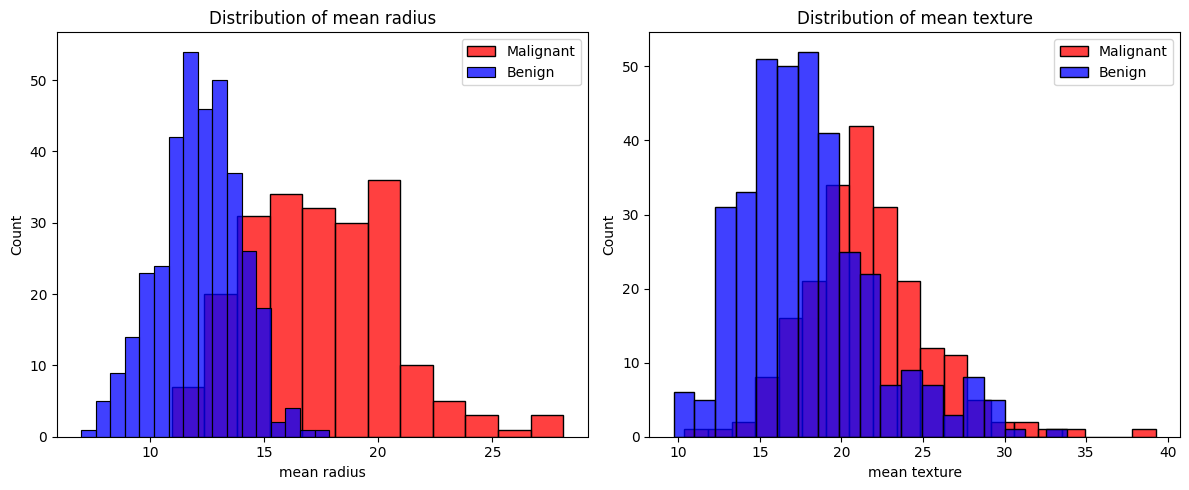

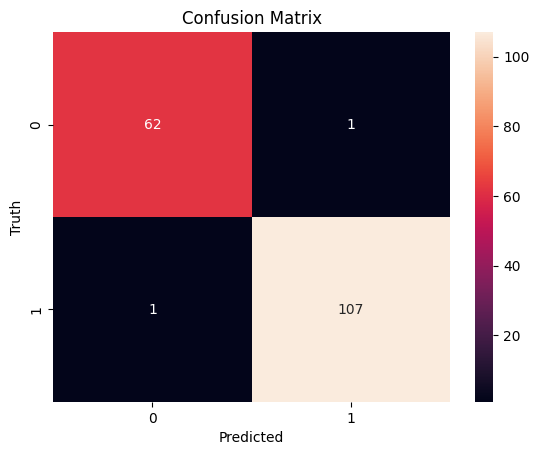

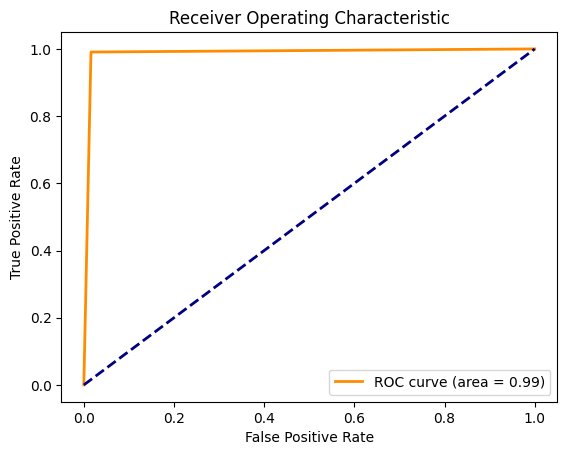

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to a DataFrame for easier visualization
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

# Plotting distributions of the first two features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['target'] == 0][df.columns[0]], color='red', label='Malignant')
sns.histplot(df[df['target'] == 1][df.columns[0]], color='blue', label='Benign')
plt.title('Distribution of ' + df.columns[0])
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df[df['target'] == 0][df.columns[1]], color='red', label='Malignant')
sns.histplot(df[df['target'] == 1][df.columns[1]], color='blue', label='Benign')
plt.title('Distribution of ' + df.columns[1])
plt.legend()

plt.tight_layout()
plt.show()

# Continue with the model training and evaluation process
# ...

# After training the model and making predictions:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Newton's method

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

class LogisticRegressionNewtonMethod:
    def __init__(self, n_iterations=10):
        self.n_iterations = n_iterations
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.n_iterations):
            scores = np.dot(X, self.weights)
            predictions = 1 / (1 + np.exp(-scores))

            # Gradient and Hessian
            gradient = np.dot(X.T, predictions - y) / n_samples
            H = np.dot(X.T * predictions * (1 - predictions), X) / n_samples

            # Update weights
            self.weights -= np.linalg.solve(H, gradient)

    def predict(self, X):
        scores = np.dot(X, self.weights)
        predictions = 1 / (1 + np.exp(-scores))
        return [1 if i > 0.5 else 0 for i in predictions]

# Create and train the model
model = LogisticRegressionNewtonMethod()
model.fit(X_train, y_train)

# Predictions and Evaluation
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

Accuracy: 0.9239766081871345


Visualize the Data:

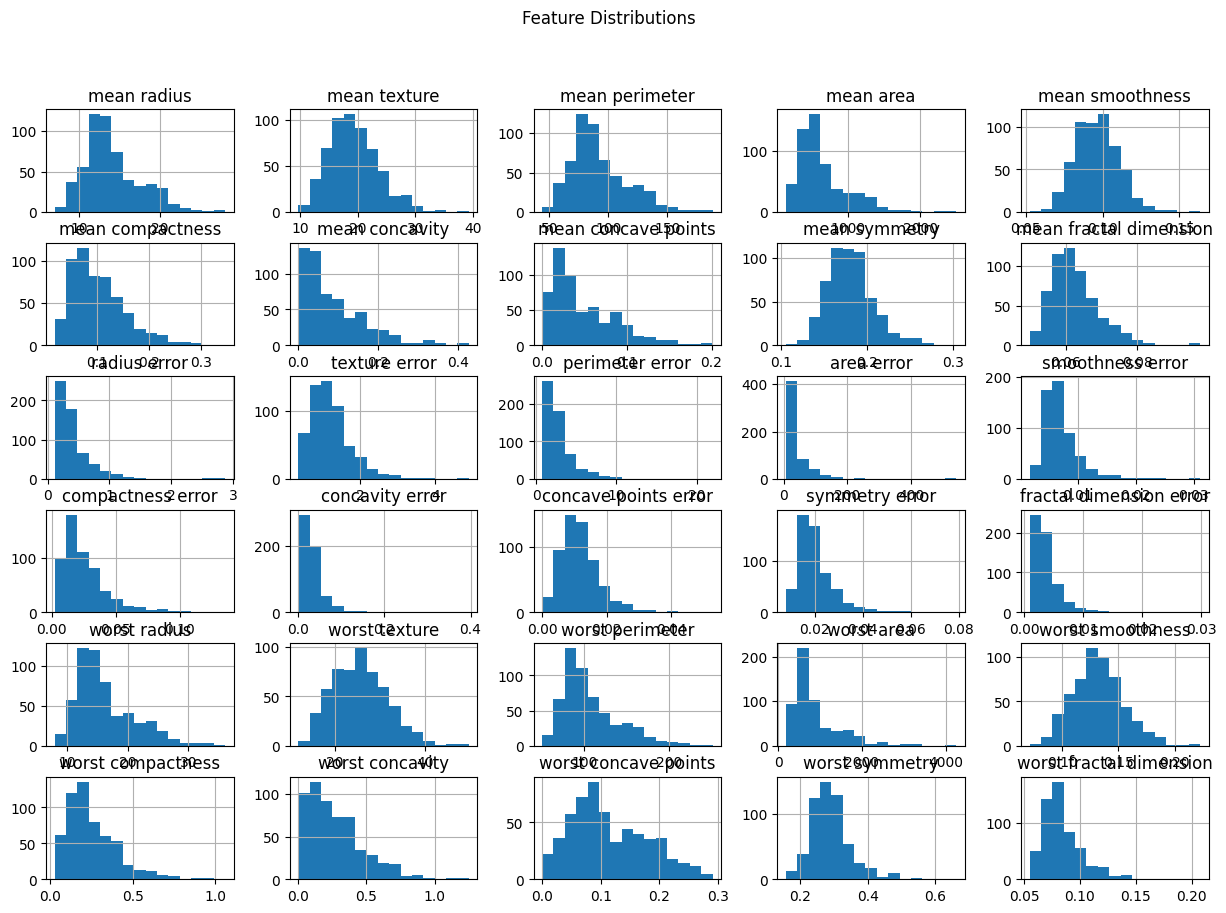

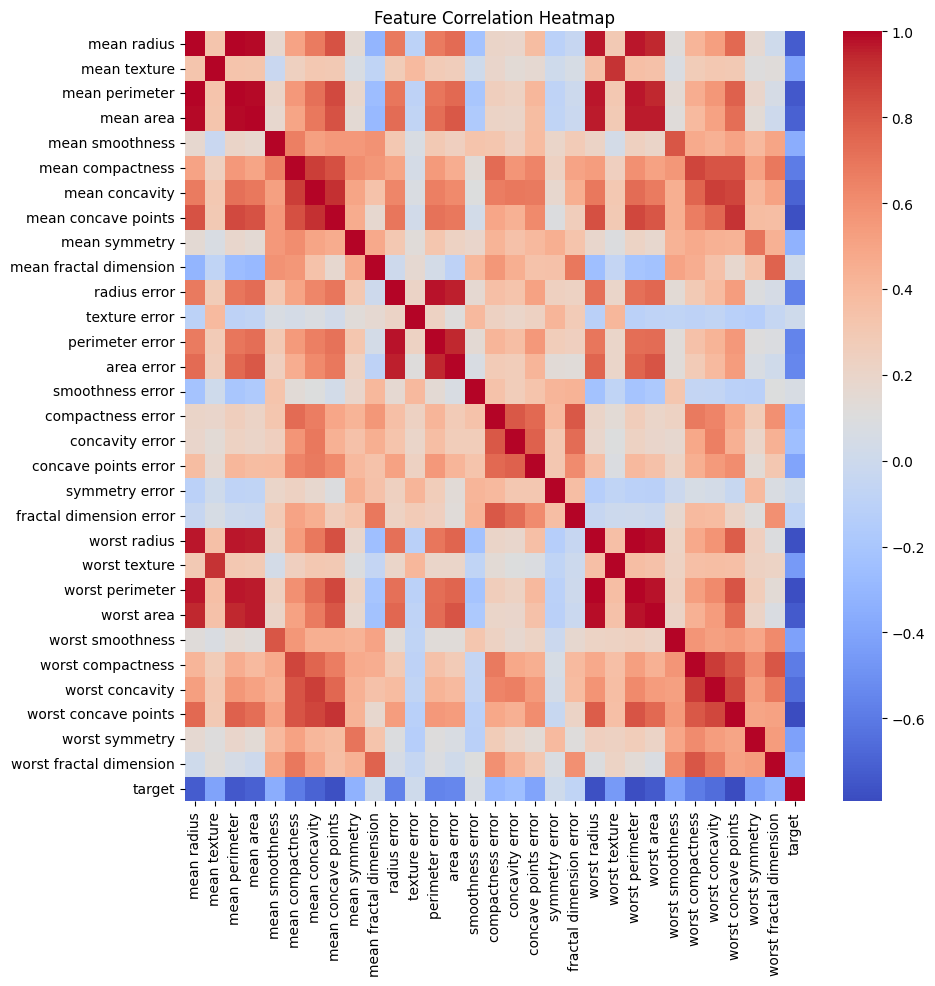

Accuracy: 0.9239766081871345


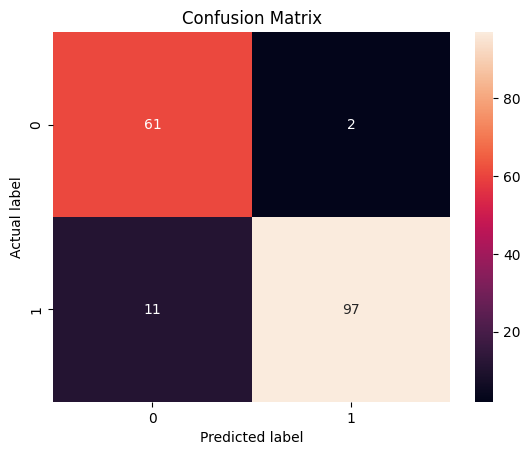

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for easier plotting
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Histograms for each feature in the dataset
df.drop('target', axis=1).hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression with Newton's Method
# ... [Model implementation code here]

# Create and train the model
model = LogisticRegressionNewtonMethod()
model.fit(X_train, y_train)

# Predictions and Evaluation
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In this example, the code uses the breast cancer dataset and performs logistic regression optimized by Newton's Method

In [65]:
import numpy as np
import pandas as pd
from sklearn import datasets
import plotly.graph_objects as go
import plotly.express as px
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

#loading breast cancer dataset
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=np.c_[cancer['data'], cancer['target']],
                         columns=np.concatenate([cancer['feature_names'], ['target']]))

#for visualization
features = ['mean radius', 'mean texture']
cancer_df['target'] = np.where(cancer_df['target'] == 0, 0, 1)

#data prep
X = cancer_df[features]
y = cancer_df['target']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#logistic regression model
model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#plot decision boundry
def plot_decisionboundary(X, y, features):
    fig = go.Figure()

    for threshold in np.linspace(0.1, 0.9, 9):
        model = LogisticRegression()
        model.fit(X, y > threshold)
        y_pred = model.predict(X)

        trace = go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers',
                           marker=dict(color=y_pred, colorscale='Viridis', size=10,
                                       line=dict(color='black', width=0.5)),
                           name=f'Threshold={threshold:.1f}')

        fig.add_trace(trace)

    fig.update_layout(title='Logistic Regression Decision Boundary ',
                      xaxis=dict(title=features[0]),
                      yaxis=dict(title=features[1]),
                      sliders=[dict(steps=[dict(method='relayout',
                                                args=['shapes', []])],
                                    active=0,
                                    visible=True,
                                    x=0.1,
                                    y=0,
                                    len=0.9)])

    fig.show()



plot_decisionboundary(X_scaled, y, features)

# visualize confusion matrix 
def plot_confusionmatrix(X, y):
    fig = go.Figure()

    for threshold in np.linspace(0.1, 0.9, 9):
        model = LogisticRegression()
        model.fit(X, y > threshold)
        y_pred = model.predict(X)
        conf_matrix = confusion_matrix(y > threshold, y_pred)

        trace = go.Heatmap(z=conf_matrix, zmin=0, zmax=len(X), colorscale='Viridis',
                           x=['Predicted 0', 'Predicted 1'], y=['Actual 0', 'Actual 1'],
                           name=f'Threshold={threshold:.1f}')

        fig.add_trace(trace)

    fig.update_layout(title='Confusion Matrix ',
                      xaxis=dict(title='Predicted Label'),
                      yaxis=dict(title='Actual Label'),
                      sliders=[dict(steps=[dict(method='relayout',
                                                args=['shapes', []])],
                                    active=0,
                                    visible=True,
                                    x=0.1,
                                    y=0,
                                    len=0.9)])

    fig.show()

plot_confusionmatrix(X_scaled, y)

Accuracy: 90.35%


In [66]:
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import numpy as np

def plot_roc_curve(X, y, threshold):
    fig = go.Figure()

    model = LogisticRegression()
    model.fit(X, y > threshold)
    y_pred_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    auc_value = auc(fpr, tpr)

    trace = go.Scatter(x=fpr, y=tpr, mode='lines',
                       name=f'Threshold={threshold:.1f}, AUC={auc_value:.2f}')

    fig.add_trace(trace)

    fig.update_layout(title='ROC Curve',
                      xaxis=dict(title='False Positive Rate'),
                      yaxis=dict(title='True Positive Rate'))

    fig.show()

# Set your data X and y here
# X = ...
# y = ...

# Set the threshold value
threshold_value = 0.5

# Plot ROC curve with the specified threshold
plot_roc_curve(X, y, threshold_value)